#<h1><center>Lab 2 - A2</center></h1>

# Simulated Annealing (SA)

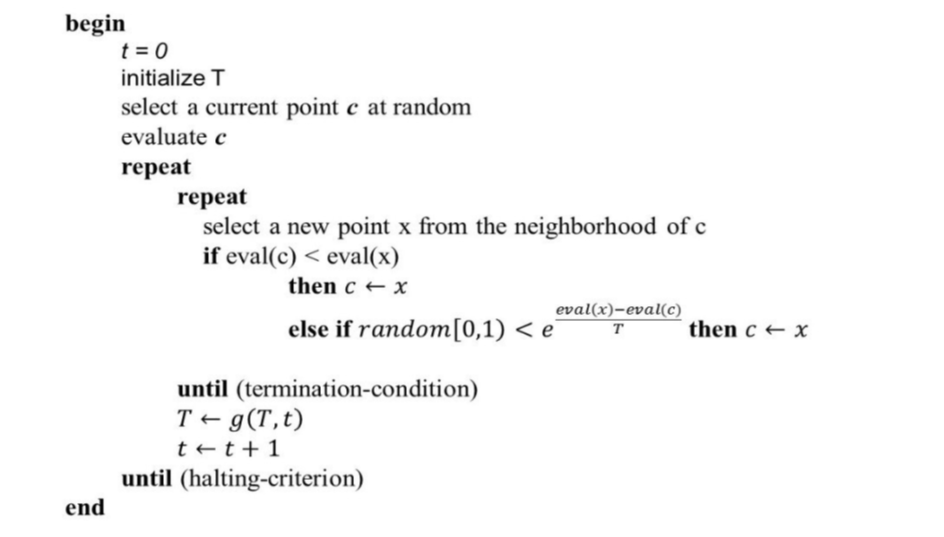


*	Schema de răcire dată de funcţia g poate fi:
 *	T(k+1)= alpha * T(k), cu alpha o valoare subunitară dar apropiată de 1 (de exemplu, alpha=0.99)  
 *	T(k+1)=T(k)/log(k+1)
 *	T(k+1)=T(k)/k  
unde T(k) este temperatura la iteraţia k.
* Valoarea iniţială a temperaturii trebuie să fie suficient de mare ex. T=10000.
*	Criteriul de oprire poate fi:
 *	Când valoarea temperaturii ajunge la  o valoare minimă prestabilită
 *	Numărul de iterații parcurse ajunge la un maxim


## Imports

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import random
import math
import time

##	Lucru în timpul laboratorului

1.	Completarea de cod în fișierul Jupyter Notebook (A2.ipynb) unde este notat cu TODO:
 1.	Completarea de cod pentru SA în cazul rezolvării problemei rucsacului (20p)
 1.	Completarea tabelului de date (10p)
 1.	Completarea de cod pentru formarea unei soluții TSP (10p)
 1. Completarea de cod pentru calcul eval/fitness soluție (10p)
 1.	Completarea de cod pentru formarea unei vecinătăți cu 2-swap (5p)
 1.	Completarea de cod pentr SA în cazul rezolvării TSP (10p)
 1.	Completarea tabelului de date (10p)

**Total Punctaj A2-Lab = 75p**

**Deadline Lab 2**

### Funcții problema rucsacului

#### Încărcare de date

In [2]:
# definire încărcare date
def load_data_rucsac(file_name: str) -> "tuple[list[tuple[int, int]], int]":
  """
  Citeste datele din fisierul file_name
  """
  weights_and_values = []
  with open(file_name) as f:
    nr_obj = int(f.readline())
    for i in range(nr_obj):
      line = f.readline()
      line = line.split(" ")
      line = [x for x in line if x != ""]
      weights_and_values.append(tuple(int(x) for x in line[1:]))
    max_capacity = int(f.readline())
  return weights_and_values, max_capacity
#load_data_rucsac("/content/rucsac-200.txt") # rucsac-20.txt and rucsac-200.txt

#### Formarea unei soluții, vecinătate și fitness

In [3]:
# definire funcții de fitness/evaluare și generare

def is_valid_rucsac(objects: list, sol: list, max_capacity: int):
  """
  Verifica validitatea unei solutii
  """
  if sol is None:
    return False
  weight = 0
  i = 0
  while i < len(sol) and weight <= max_capacity:
    weight += objects[i][1] * sol[i]
    i += 1
  return weight <= max_capacity

def random_neighbor_rucsac(sol: list):
  """
  Generează un vecin aleatoriu pentru o soluție
  """
  x = sol[:]
  index = np.random.randint(len(sol))
  x[index] = 1 - x[index]
  return x

def generate_solution_rucsac(n: int):
  """
  Genereaza o solutie aleatoare
  """
  return list(np.random.randint(2, size=n))


def generate_valid_solution_rucsac(n: int, objects: list, max_capacity: int):
  """
  Genereaza o solutie valida aleatoare
  INPUT
  ------
  n: numarul de obiecte
  objects: obiectele care pot fi adăugate în rucsac
  max_capacity: capacitatea maximă a rucsacului
  OUTPUT
  ------
  sol: soluția generată
  """
  stop = False
  sol = []
  while not stop:
    sol = generate_solution_rucsac(n)
    stop = is_valid_rucsac(objects, sol, max_capacity)
  return sol

def fitness_rucsac(objects: list, sol: list, max_capacity: int):
  """
  Evaluează o soluție pentru problema rucsacului.
  INPUT
  ------
  objects: obiectele care pot fi adăugate în rucsac
  sol: solutția drept o listă de 0 și 1 de lungimea numărului de obiecte
  max_capacity: capacitatea maximă a rucsacului
  OUTPUT
  ------
  value: valoarea tutoror obiectelor care au fost adăugate în rucsac
        sau -1 dacă greutatea obiectelor trece peste greutatea maximă permisă
  """
  value = 0
  if not is_valid_rucsac(objects, sol, max_capacity):
    return -1

  for i in range(len(sol)):
      value += objects[i][0] * sol[i]
  return value

# Cod pentru testarea funcțiilor pentru rucsac
# o, m = load_data_rucsac("/content/rucsac-200.txt")
# sol = generate_valid_solution_rucsac(len(o), o, m)
# print(sol)
# print(fitness_rucsac(o, sol, m))
# n = random_neighbor_rucsac(sol)
# print(n)
# print(fitness_rucsac(o, n, m))

### Funcții TSP

#### Încărcare de date

In [4]:
def read_from_file_TSP(name: str) -> "tuple[list[tuple], int]":
  """
  Citeste datele din fisierul name pentru problema TSP
  INPUT
  -----
  name: numele fisierului
  OUTPUT
  ------
  locations: lista de locații sub forma (index, x, y)
  dimension: dimensiunea problemei
  """
  locations = []
  dimension = 0
  with open(name, 'r') as file:
    for i in range(6):
      line = file.readline()
      line = line.replace("\n", "")
      line = line.split(" ")
      if len(line) == 2 and line[0] == "DIMENSION:":
        dimension = int(line[1])
    for i in range(dimension):
      line = file.readline()
      line = line.replace("\n", "")
      line = line.split(" ")
      line = [x for x in line if x != ""]
      locations.append(tuple(int(x) for x in line[:]))
  return locations, dimension

def read_from_file_TSPOpt(name: str):
  """
  Citeste solutia din fisierul name pentru problema TSP
  INPUT
  -----
  name: numele fisierului
  OUTPUT
  ------
  solution: lista de locații sub forma de index
  """
  solution = []
  dimension = 0
  with open(name, 'r') as file:
    for i in range(5):
      line = file.readline()
      line = line.replace("\n", "")
      line = line.split(" ")
      if len(line) == 3 and line[0] == "DIMENSION":
        dimension = int(line[2])
    for i in range(dimension):
      line = file.readline()
      line = line.replace("\n", "")
      solution.append(int(line) - 1)
  return solution

#read_from_file_TSP("/content/kroC100.tsp")
#read_from_file_TSP("/content/kroC100.opt.tour")

#### Formarea unei soluții, vecinătate și fitness

In [6]:
def distance_matrix_TSP(locations: list):
  """
  Formarea matricei de distanțe pe baza datelor încărcate
  """
  length = len(locations)
  dm = np.zeros([length, length], dtype=int)
  for i in range(length):
    for j in range(i + 1, length):
      xd = locations[i][1] - locations[j][1]
      yd = locations[i][2] - locations[j][2]
      dm[i][j] = int(np.sqrt(xd**2 + yd**2))
      dm[j][i] = dm[i][j]
  return dm

def generate_solution_TSP(dimension: int):
  """
  Generează o soluție aleatoare pentru problema TSP sub forma unei permutari
  """
  return random.sample(range(dimension), dimension)

def fitness_TSP(solution: list, dm: "list[list]"):
  """
  Determina fitness-ul unei soluții pentru problema TSP
  """
  distance = 0
  for i in range(len(solution) - 1):
        distance += dm[solution[i]][solution[i + 1]]
  distance += dm[solution[-1]][solution[0]]
  return distance

def two_swap(solution: list, dimension: int):
  """
  Generează un vecin aleatoriu pentru o soluție prin metoda 2-swap
  """
  x = solution[:]
  i, j= random.sample(range(len(solution)), 2)
  while j == i:
    j = 0
  x[i], x[j] = x[j], x[i]
  return x


### Funcții Simulated Annealing (SA)

In [7]:
def simulated_annealing_rucsac(t: float, alpha: float, t_min: float, max_iterations: int,
                               objects: "list[tuple]", max_capacity: int):
    """
    Aplicarea algoritmului SA pentru problema rucsacului
    INPUT
    -----
    t - temperatura initiala
    alpha - coeficientul de reducere a temperaturii
    t_min - temperatura minima
    max_iterations - numarul maxim de iteratii
    objects - obiectele care pot fi adaugate in rucsac
    max_capacity - capacitatea maxima a acestuia
    """
    c = generate_valid_solution_rucsac(len(objects), objects, max_capacity)
    fc = fitness_rucsac(objects, c, max_capacity)
    found_solutions = [fc]
    while t > t_min:
        k = 0
        while k < max_iterations:
            x = random_neighbor_rucsac(c)
            fx = fitness_rucsac(objects, x, max_capacity)
            delta = fc - fx
            if delta < 0:
                c = x[:]
                fc = fitness_rucsac(objects, c, max_capacity)
                found_solutions.append(fc)
            elif np.random.random() < np.exp(-delta/t):
                c = x[:]
                fc = fitness_rucsac(objects, x, max_capacity)
                found_solutions.append(fc)
            k += 1
        t = t * alpha
    return c, fc, found_solutions

def simulated_annealing_TSP(t: float, alpha: float, t_min: float, max_iterations: int,
                            dm: "list[list]", dimension: int):
    """
    Aplicarea algoritmului SA pentru TSP
    INPUT
    -----
    t - temperatura initiala
    alpha - coeficientul de reducere a temperaturii
    t_min - temperatura minima
    max_iterations - numarul maxim de iteratii
    dm - matricea de distante
    dimension - dimensiunea problemei
    """
    c = generate_solution_TSP(dimension)
    fc = fitness_TSP(c, dm)
    found_solutions = [fc]
    while t > t_min:
        k = 0
        while k < max_iterations:
            x = two_swap(c, dimension)
            fx = fitness_TSP(c, dm)
            delta = fx - fc
            if delta < 0:
                c = x[:]
                fc = fitness_TSP(c,dm)
                found_solutions.append(fc)
            elif np.random.random() < np.exp(-delta/t):
                c = x[:]
                fc = fitness_TSP(c, dm)
                found_solutions.append(fc)
            k += 1
        t *= alpha
    return c, fc, found_solutions

### Completare tabele

In [ ]:
# Completare rucsac

def sa_rucsac_n_times(n: int, t: float, alpha: float, t_min: float, max_iterations: int,
                               dm: "list[list]", dimension: int):
  """
  Ruleaza algoritmul de n ori si returneaza cele mai bune solutii
  """
  best_solutions = []
  average_time = 0
  for _ in range(n):
    start = time.time()
    best_solution, best_fitness, _ = simulated_annealing_rucsac(t, alpha, t_min, max_iterations, objects, max_capacity)
    stop = time.time() - start
    average_time = stop
    best_solutions.append((best_solution, best_fitness))
  average_time /= n
  return best_solutions, average_time

problem_instances = ['rucsac-20.txt', 'rucsac-200.txt']
n = 5
k = 10
values_for_alpha = [0.6, 0.999]
values_for_t = [100, 1000]
values_for_t_min = [0.001, 0.000001]
markdown_table = "| pi | n | k | T | t_min| alpha | Best Solution | Avg Solution | Avg Time |\n"
markdown_table += "|---|---|---|---|---|---|---|---|---|\n"


for pi in problem_instances:
  objects, max_capacity = load_data_rucsac(pi)
  for t in values_for_t:
    for t_min in values_for_t_min:
      for alpha in values_for_alpha:
          best_results, average_time = sa_rucsac_n_times(n, t, alpha, t_min, k, objects, max_capacity)
          best = max(best_results, key=lambda x: x[1])
          average = sum([x[1] for x in best_results]) / len(best_results)
          markdown_table += f"| {pi} | {n} | {k} | {t} | {t_min} | {alpha} | {best[1]} | {average} | {average_time} |\n"

markdown_table # copy paste intr-o celula de text

'| pi | n | k | T | t_min| alpha | Best Solution | Avg Solution | Avg Time |\n|---|---|---|---|---|---|---|---|---|\n| rucsac-20.txt | 5 | 10 | 100 | 0.001 | 0.6 | 666 | 599.4 | 0.0006858348846435547 |\n| rucsac-20.txt | 5 | 10 | 100 | 0.001 | 0.999 | 711 | 700.6 | 0.3791944980621338 |\n| rucsac-20.txt | 5 | 10 | 100 | 1e-06 | 0.6 | 660 | 600.2 | 0.0011825084686279297 |\n| rucsac-20.txt | 5 | 10 | 100 | 1e-06 | 0.999 | 726 | 702.0 | 0.5972652435302734 |\n| rucsac-20.txt | 5 | 10 | 1000 | 0.001 | 0.6 | 633 | 605.0 | 0.0008594989776611328 |\n| rucsac-20.txt | 5 | 10 | 1000 | 0.001 | 0.999 | 726 | 711.8 | 0.4511500358581543 |\n| rucsac-20.txt | 5 | 10 | 1000 | 1e-06 | 0.6 | 648 | 624.2 | 0.0023258209228515627 |\n| rucsac-20.txt | 5 | 10 | 1000 | 1e-06 | 0.999 | 726 | 695.4 | 0.8357172966003418 |\n| rucsac-200.txt | 5 | 10 | 100 | 0.001 | 0.6 | 133034 | 132140.8 | 0.0037445068359375 |\n| rucsac-200.txt | 5 | 10 | 100 | 0.001 | 0.999 | 132543 | 131705.0 | 1.9804167747497559 |\n| rucsac-200.

| pi | n | k | T | t_min| alpha | Best Solution | Avg Solution | Avg Time |
|---|---|---|---|---|---|---|---|---|
| rucsac-20.txt | 5 | 10 | 100 | 0.001 | 0.6 | 655 | 569.2 | 0.0009380817413330078 |
| rucsac-20.txt | 5 | 10 | 100 | 0.001 | 0.999 | 726 | 703.0 | 0.5281653881072998 |
| rucsac-20.txt | 5 | 10 | 100 | 1e-06 | 0.6 | 653 | 607.0 | 0.005172872543334961 |
| rucsac-20.txt | 5 | 10 | 100 | 1e-06 | 0.999 | 726 | 693.2 | 0.7094807624816895 |
| rucsac-20.txt | 5 | 10 | 1000 | 0.001 | 0.6 | 650 | 530.4 | 0.0015798091888427734 |
| rucsac-20.txt | 5 | 10 | 1000 | 0.001 | 0.999 | 718 | 699.2 | 0.6403846740722656 |
| rucsac-20.txt | 5 | 10 | 1000 | 1e-06 | 0.6 | 623 | 564.4 | 0.0023781776428222655 |
| rucsac-20.txt | 5 | 10 | 1000 | 1e-06 | 0.999 | 726 | 702.8 | 0.6774191856384277 |
| rucsac-200.txt | 5 | 10 | 100 | 0.001 | 0.6 | 133351 | 132429.8 | 0.00351715087890625 |
| rucsac-200.txt | 5 | 10 | 100 | 0.001 | 0.999 | 132924 | 132486.0 | 2.165087890625 |
| rucsac-200.txt | 5 | 10 | 100 | 1e-06 | 0.6 | 132138 | 131838.0 | 0.005373668670654297 |
| rucsac-200.txt | 5 | 10 | 100 | 1e-06 | 0.999 | 132632 | 132168.8 | 2.988794183731079 |
| rucsac-200.txt | 5 | 10 | 1000 | 0.001 | 0.6 | 132540 | 132072.2 | 0.004440927505493164 |
| rucsac-200.txt | 5 | 10 | 1000 | 0.001 | 0.999 | 132922 | 132646.0 | 2.385439729690552 |
| rucsac-200.txt | 5 | 10 | 1000 | 1e-06 | 0.6 | 132574 | 132180.2 | 0.006432533264160156 |
| rucsac-200.txt | 5 | 10 | 1000 | 1e-06 | 0.999 | 133217 | 132706.8 | 3.854534959793091 |


In [ ]:
# Completare rucsac

def sa_TSP_n_times(n: int, t: float, alpha: float, t_min: float, max_iterations: int,
                               dm: "list[list]", dimension: int):
  """
  Ruleaza algoritmul de n ori si returneaza cele mai bune solutii
  """
  best_solutions = []
  average_time = 0
  for _ in range(n):
    start = time.time()
    best_solution, best_fitness, _ = simulated_annealing_TSP(t, alpha, t_min, max_iterations, dm, dimension)
    stop = time.time() - start
    average_time = stop
    best_solutions.append((best_solution, best_fitness))
  average_time /= n
  return best_solutions, average_time

pi = "pr107.tsp"
n = 5
k = 10
values_for_alpha = [0.6, 0.999]
values_for_t = [100, 1000]
values_for_t_min = [0.001, 0.000001]
markdown_table = "| pi | n | k | T | t_min| alpha | Best Solution | Avg Solution | Avg Time |\n"
markdown_table += "|---|---|---|---|---|---|---|---|---|\n"

locations, dimension = read_from_file_TSP(pi)
dm = distance_matrix_TSP(locations)
for t in values_for_t:
  for t_min in values_for_t_min:
    for alpha in values_for_alpha:
        best_results, average_time = sa_TSP_n_times(n, t, alpha, t_min, k, dm, dimension)
        best = max(best_results, key=lambda x: x[1])
        average = sum([x[1] for x in best_results]) / len(best_results)
        markdown_table += f"| {pi} | {n} | {k} | {t} | {t_min} | {alpha} | {best[1]} | {average} | {average_time} |\n"

markdown_table # copy paste intr-o celula de text

'| pi | n | k | T | t_min| alpha | Best Solution | Avg Solution | Avg Time |\n|---|---|---|---|---|---|---|---|---|\n| pr107.tsp | 5 | 10 | 100 | 0.001 | 0.6 | 600921 | 576541.8 | 0.003697490692138672 |\n| pr107.tsp | 5 | 10 | 100 | 0.001 | 0.999 | 580935 | 560493.2 | 1.8919325351715088 |\n| pr107.tsp | 5 | 10 | 100 | 1e-06 | 0.6 | 586600 | 561025.4 | 0.005951070785522461 |\n| pr107.tsp | 5 | 10 | 100 | 1e-06 | 0.999 | 636709 | 586694.6 | 3.3370370864868164 |\n| pr107.tsp | 5 | 10 | 1000 | 0.001 | 0.6 | 605177 | 579364.0 | 0.004155254364013672 |\n| pr107.tsp | 5 | 10 | 1000 | 0.001 | 0.999 | 603705 | 572750.4 | 2.3923779010772703 |\n| pr107.tsp | 5 | 10 | 1000 | 1e-06 | 0.6 | 643257 | 574505.8 | 0.006250953674316407 |\n| pr107.tsp | 5 | 10 | 1000 | 1e-06 | 0.999 | 582434 | 570570.6 | 3.5796385288238524 |\n'

| pi | n | k | T | t_min| alpha | Best Solution | Avg Solution | Avg Time |
|---|---|---|---|---|---|---|---|---|
| pr107.tsp | 5 | 10 | 100 | 0.001 | 0.6 | 600921 | 576541.8 | 0.003697490692138672 |
| pr107.tsp | 5 | 10 | 100 | 0.001 | 0.999 | 580935 | 560493.2 | 1.8919325351715088 |
| pr107.tsp | 5 | 10 | 100 | 1e-06 | 0.6 | 586600 | 561025.4 | 0.005951070785522461 |
| pr107.tsp | 5 | 10 | 100 | 1e-06 | 0.999 | 636709 | 586694.6 | 3.3370370864868164 |
| pr107.tsp | 5 | 10 | 1000 | 0.001 | 0.6 | 605177 | 579364.0 | 0.004155254364013672 |
| pr107.tsp | 5 | 10 | 1000 | 0.001 | 0.999 | 603705 | 572750.4 | 2.3923779010772703 |
| pr107.tsp | 5 | 10 | 1000 | 1e-06 | 0.6 | 643257 | 574505.8 | 0.006250953674316407 |
| pr107.tsp | 5 | 10 | 1000 | 1e-06 | 0.999 | 582434 | 570570.6 | 3.5796385288238524 |


## A2-Temă

1.	Aplicare TS pentru o instanță de TSP și toate instațele anterioare ale problemei rucsacului (40p):
 * Trebuie să fie parametrizabilă folosirea 2-swap și 2-opt în cazul TSP
2.	Scrierea de documentație drept un Jupyter Notebook sau un document word/pdf (35p)
 * Documentare cod
 * Explicarea funcțiilor pe pași
 * Tabel cu rezultate pentru fiecare instanță a problemei prentru minim 5 valori diferite de parametri
 * Vizualizare rezultate între interații
 * Analiza rezultatelor
          * Comparație cu algoritmul HC pentru problema rucsacului
          * Comparație atât pentru SA, cât și pentru TS
          * Comparație între SA și TS pentru problema  TSP

**Total Punctaj A2-Temă = 75p**

**Deadline Lab 3**


### Funcții TS pentru Problema Rucsacului

In [8]:
def best_neighbour_rucsac(c: list, objects: list, max_capacity: int, tabu_list: list, fitness_best: int):
    """
    Găsește cel mai bun vecin pentru soluția actuală
    INPUT
    -----
    c: soluția curentă
    objects: obiectele care pot fi adăugate în rucsac
    max_capacity: capacitatea maximă a rucsacului
    tabu_list: lista tabu
    fitness_best: cea mai bună soluție
    OUTPUT
    ------
    x: vecinul cel mai bun
    fx: fitness-ul vecinului cel mai bun
    tabu_index: indexul elementului modificat
    """
    # Inițizalarea valorilor
    x = None
    fx = -1
    tabu_index = -1

    for i in range(len(c)): # Loop pentru considerara a n-vecini
        neighbour = c[:]
        neighbour[i] = 1 - neighbour[i] # Bit-flip

        if i not in tabu_list and is_valid_rucsac(objects, neighbour, max_capacity):
            neighbour_fitness = fitness_rucsac(objects, neighbour, max_capacity)
            if neighbour_fitness > fx:  # Schimbat din fitness-ul
                x = neighbour # Luam vecinul mai bun
                fx = neighbour_fitness
                tabu_index = i # Salvam index-ul pentru memoria tabu
    return x, fx, tabu_index

def update_tabu_rucsac(tabu_list : list, index : int, r : int):
    """
    Actualizează lista tabu
    INPUT
    -----
    tabu_list: lista tabu
    index: indexul elementului modificat
    r: valoarea de actualizare a elementului
    """
    tabu_list[index] = r # Marcăm index-ul in lista tabu pentru urmatoarele r-iteratii
    for i in range(len(tabu_list)):
        if tabu_list[i] > 0 and i != index: # Decrementam restul elementelor pozitive
            tabu_list[i] -= 1
    return tabu_list

def tabu_search_rucsac(objects: list, max_capacity: int, max_iter: int, r: int):
    """
    Aplicarea algoritmului Tabu Search pentru problema rucsacului
    INPUT
    -----
    objects: obiectele care pot fi adăugate în rucsac
    max_capacity: capacitatea maximă a rucsacului
    max_iter: numărul maxim de iterații
    """
    c = generate_valid_solution_rucsac(len(objects), objects, max_capacity) # Începem cu o solutie aleatore
    c_best = c.copy()
    fitness_best = fitness_rucsac(objects, c_best, max_capacity)
    tabu_list = [0] * len(objects)  # Initializam memoria tabu

    for _ in range(max_iter):
        x, fx, i = best_neighbour_rucsac(c, objects, max_capacity, tabu_list, fitness_best) # Calculam cel mai bun vecin

        if x is None:  # Verificare daca s-a gasit un vecin mai sus
            break

        # Actualizare soluție curentă
        c = x

        # Actualizare cea mai bună soluție
        if fx < fitness_best:
            c_best = c.copy()
            fitness_best = fx

        tabu_list = update_tabu_rucsac(tabu_list, i, r) # Actualizare

    return c_best, fitness_best

### Funcții TS pentru TSP

In [9]:
def best_neighbour_TSP(c: list, dm: list, tabu_list: list, search_type: str):
    """
    Găsește cel mai bun vecin pentru soluția actuală TSP
    INPUT
    -----
    c: soluția curentă
    dm: matricea de distante
    tabu_list: lista tabu
    search_type: tipul de căutare a vecinilor (2-swap sau 2-opt)
    """
    # Initializare
    best_neighbour = None
    best_neighbour_fitness = float('inf')
    i_best, j_best = -1, -1
    dimension = len(c)

    for i in range(dimension):
        for j in range(i + 1, dimension): # For-loop pentru alegerea a 2 indexi
            if search_type == '2-swap': # Parametrizarea alegerii vecinilor prin 2-swap sau 2-opt
                neighbour = c[:]
                neighbour[i], neighbour[j] = neighbour[j], neighbour[i]  # 2-Swap
            else:
                neighbour = c[:i] + c[i:j+1][::-1] + c[j+1:]  # 2-Opt

            neighbour_fitness = fitness_TSP(neighbour, dm) # Fitness-ul noului vecin

            if (i, j) not in tabu_list and neighbour_fitness < best_neighbour_fitness:
                best_neighbour = neighbour
                best_neighbour_fitness = neighbour_fitness # Actualizam cel mai bun fitness
                i_best, j_best = i, j # Actualizam indexi modificati pentru obtinerea celui mai bun vecin

    return best_neighbour, best_neighbour_fitness, i_best, j_best

def update_tabu_TSP(tabu_list: list, i: int, j: int, r: int):
  """
  Actualizează lista tabu pentru TSP
  INPUT
  -----
  tabu_list: lista tabu
  i: primul index modificat
  j: al doilea index modificat
  r: valoarea de actualizare a elementului
  """
  tabu_list[i] = r
  tabu_list[j] = r
  for p in range(len(tabu_list)):
    if p != i and p != j and tabu_list[p] > 0:
      tabu_list[p] -= 1
  return tabu_list

def tabu_search_TSP(dm: list, max_iter: int, r: int, search_type: str):
    """
    Aplicarea algoritmului Tabu Search pentru problema TSP
    INPUT
    -----
    dm: matricea de distante
    max_iter: numărul maxim de iterații
    r: numar de iteratii tabu
    search_type: tipul de căutare a vecinilor (2-swap sau 2-opt)
    """
    dimension = len(dm)
    c = generate_solution_TSP(dimension) # Incepem cu o solutie aleatoare
    c_best = c.copy()
    best_fitness = fitness_TSP(c_best, dm)
    tabu_list = [0] * dimension  # Dicționar pentru perechi (i,j)

    for _ in range(max_iter):
        x, fx, i, j = best_neighbour_TSP(c, dm, tabu_list, search_type) # Cautam cel mai bun vecin

        if x is None:  # Dacă nu găsim vecini valizi
            break

        # Actualizare solutie curenta
        c = x

        # Actualizare cea mai bună soluție
        if fx < best_fitness:
            c_best = c.copy()
            best_fitness = fx

        # Actualizare lista tabu
        tabu_list = update_tabu_TSP(tabu_list, i, j, r)

    return c_best, best_fitness

In [16]:
def ts_rucsac_n_times(n: int, max_iter: int, objects: list, max_capacity: int, r: int):
    """
    Rulează algoritmul Tabu Search de n ori și returnează cele mai bune soluții
    """
    best_solutions = []
    average_time = 0
    for _ in range(n):
        start = time.time()
        best_solution, best_fitness = tabu_search_rucsac(objects, max_capacity, max_iter, r)
        stop = time.time() - start
        average_time += stop
        best_solutions.append((best_solution, best_fitness))
    average_time /= n
    return best_solutions, average_time

problem_instances = ['rucsac-20.txt', 'rucsac-200.txt']
n = 5
k = 10
values_for_r = [2, 5, 10]
markdown_table = "| pi | n | k | r | Best Solution | Avg Solution | Avg Time |\n"
markdown_table += "|---|---|---|---|---------------|--------------|----------|\n"

for pi in problem_instances:
    objects, max_capacity = load_data_rucsac(pi)
    for r in values_for_r:
        best_results, average_time = ts_rucsac_n_times(n, k, objects, max_capacity, r)
        best = max(best_results, key=lambda x: x[1])
        average = sum([x[1] for x in best_results]) / len(best_results)
        markdown_table += f"| {pi} | {n} | {k} | {r} | {best[1]} | {average} | {average_time} |\n"

markdown_table

'| pi | n | k | r | Best Solution | Avg Solution | Avg Time |\n|---|---|---|---|---------------|--------------|----------|\n| rucsac-20.txt | 5 | 10 | 2 | 600 | 359.6 | 0.0030752182006835937 |\n| rucsac-20.txt | 5 | 10 | 5 | 536 | 375.8 | 0.0018964767456054687 |\n| rucsac-20.txt | 5 | 10 | 10 | 433 | 381.0 | 0.001773977279663086 |\n| rucsac-200.txt | 5 | 10 | 2 | 130445 | 124634.2 | 0.18844714164733886 |\n| rucsac-200.txt | 5 | 10 | 5 | 124917 | 116600.2 | 0.20215749740600586 |\n| rucsac-200.txt | 5 | 10 | 10 | 131033 | 123779.0 | 0.18930559158325194 |\n'

| pi | n | k | r | Best Solution | Avg Solution | Avg Time |
|---|---|---|---|---------------|--------------|----------|
| rucsac-20.txt | 5 | 10 | 2 | 402 | 322.8 | 0.0023816585540771484 |
| rucsac-20.txt | 5 | 10 | 5 | 467 | 377.0 | 0.0022217750549316405 |
| rucsac-20.txt | 5 | 10 | 10 | 456 | 393.6 | 0.001747894287109375 |
| rucsac-20.txt | 5 | 10 | 20 | 420 | 375.0 | 0.0018208980560302734 |
| rucsac-200.txt | 5 | 10 | 2 | 130696 | 124411.4 | 0.18864364624023439 |
| rucsac-200.txt | 5 | 10 | 5 | 128190 | 121472.8 | 0.19359192848205567 |
| rucsac-200.txt | 5 | 10 | 10 | 128918 | 120409.8 | 0.19465241432189942 |
| rucsac-200.txt | 5 | 10 | 20 | 129304 | 125049.6 | 0.19080548286437987 |


In [17]:
def ts_TSP_n_times(n: int, max_iter: int, dm: list, r: int, search_type: str):
    """
    Rulează algoritmul Tabu Search de n ori și returnează cele mai bune soluții
    """
    best_solutions = []
    average_time = 0
    for _ in range(n):
        start = time.time()
        best_solution, best_fitness = tabu_search_TSP(dm, max_iter, r, search_type)
        stop = time.time() - start
        average_time += stop
        best_solutions.append((best_solution, best_fitness))
    average_time /= n
    return best_solutions, average_time

pi = "pr107.tsp"
n = 5
k = 10
values_for_r = [2, 5, 10]
values_for_search_type = ['2-opt', '2-swap']
markdown_table = "| pi | n | k | r | search_type | Best Solution | Avg Solution | Avg Time |\n"
markdown_table += "|---|---|---|---|-------------|---------------|--------------|----------|\n"

locations, dimension = read_from_file_TSP(pi)
dm = distance_matrix_TSP(locations)
for search_type in values_for_search_type:
  for r in values_for_r:
    best_results, average_time = ts_TSP_n_times(n, k, dm, r, search_type)
    best = min(best_results, key=lambda x: x[1])  # Minimizăm distanța pentru TSP
    average = sum([x[1] for x in best_results]) / len(best_results)
    markdown_table += f"| {pi} | {n} | {k} | {r} | {search_type} | {best[1]} | {average} | {average_time} |\n"

markdown_table

'| pi | n | k | r | search_type | Best Solution | Avg Solution | Avg Time |\n|---|---|---|---|-------------|---------------|--------------|----------|\n| pr107.tsp | 5 | 10 | 2 | 2-opt | 363692 | 408039.6 | 2.3036099433898927 |\n| pr107.tsp | 5 | 10 | 5 | 2-opt | 360980 | 389782.4 | 2.3611796379089354 |\n| pr107.tsp | 5 | 10 | 10 | 2-opt | 395916 | 411029.8 | 2.384880018234253 |\n| pr107.tsp | 5 | 10 | 2 | 2-swap | 284866 | 333077.4 | 2.2631550312042235 |\n| pr107.tsp | 5 | 10 | 5 | 2-swap | 293942 | 347922.4 | 2.258466911315918 |\n| pr107.tsp | 5 | 10 | 10 | 2-swap | 305197 | 331359.0 | 2.2808444499969482 |\n'

| pi | n | k | r | search_type | Best Solution | Avg Solution | Avg Time |
|---|---|---|---|-------------|---------------|--------------|----------|
| pr107.tsp | 5 | 10 | 2 | 2-opt | 353793 | 397795.0 | 2.6277873516082764 |
| pr107.tsp | 5 | 10 | 5 | 2-opt | 358961 | 394455.2 | 2.374435043334961 |
| pr107.tsp | 5 | 10 | 10 | 2-opt | 386258 | 409556.6 | 2.3648256778717043 |
| pr107.tsp | 5 | 10 | 20 | 2-opt | 351525 | 389925.0 | 2.3527758598327635 |
| pr107.tsp | 5 | 10 | 2 | 2-swap | 305971 | 330952.8 | 2.277150869369507 |
| pr107.tsp | 5 | 10 | 5 | 2-swap | 313008 | 331921.6 | 2.3883225440979006 |
| pr107.tsp | 5 | 10 | 10 | 2-swap | 307649 | 338973.4 | 2.41811146736145 |
| pr107.tsp | 5 | 10 | 20 | 2-swap | 297086 | 333107.2 | 2.395489311218262 |
